# Price Prediction for Second Hand Cars in Germany

## Contents

1-EDA (Exploratory Data Analysis)

  1-2-Feature Engineering

2-Modeling 

  2-0-Splitting the Data Set
  
  2-1-Linear Regression
  
  2-2-Decision Tree
  
  2-3-Bagging
  
  3-4-AdaBoost
  
  2-5-K-Nearest Neighbours
  
  2-6-Random Forest
  
3-Conclusion

  3-1-Summary

  3-2-Model Comparison
  
  3-3-Recommendations and Future Work

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time
from IPython.display import display

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1-EDA (Exploratory Data Analysis)

The data set is cleaned in eda.ipynb and stored in final_car_data.csv. 

In [2]:
selected_df = pd.read_csv('final_car_data.csv')

In [3]:
selected_df

,year,price,power_kw,mileage_in_km,brand
0,2011,9900,103.0,119000.0,2
1,2011,9290,118.0,184574.0,2
2,2011,9499,77.0,114860.0,2
3,2011,11990,103.0,205013.0,2
4,2011,10900,150.0,192350.0,2
...,...,...,...,...,...
89723,2023,28988,75.0,10.0,0
89724,2023,29077,81.0,1869.0,0
89725,2023,28780,75.0,10.0,0
89726,2023,28788,81.0,5.0,0


In [4]:
selected_df.describe

<bound method NDFrame.describe of        year  price  power_kw  mileage_in_km  brand
0      2011   9900     103.0       119000.0      2
1      2011   9290     118.0       184574.0      2
2      2011   9499      77.0       114860.0      2
3      2011  11990     103.0       205013.0      2
4      2011  10900     150.0       192350.0      2
...     ...    ...       ...            ...    ...
89723  2023  28988      75.0           10.0      0
89724  2023  29077      81.0         1869.0      0
89725  2023  28780      75.0           10.0      0
89726  2023  28788      81.0            5.0      0
89727  2023  28420      81.0         4900.0      0

[89728 rows x 5 columns]>

## 2-Modeling 

### 2-0-Splitting the Data Set

In [5]:
# Splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = selected_df.drop(columns='price').values  # Assuming 'price' is the target variable
y = selected_df['price'].values

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.02000e+03 9.60000e+01 1.66900e+04 3.00000e+00]
 [2.02100e+03 8.10000e+01 2.57020e+04 3.00000e+00]
 [2.01500e+03 1.10000e+02 1.20000e+05 5.00000e+00]
 ...
 [2.01400e+03 7.70000e+01 2.40521e+05 0.00000e+00]
 [2.01200e+03 2.30000e+02 3.54500e+05 2.00000e+00]
 [2.01600e+03 1.10000e+02 1.38000e+05 4.00000e+00]]
[[2.0160e+03 6.6000e+01 1.3200e+05 0.0000e+00]
 [2.0170e+03 9.0000e+01 5.6802e+04 1.0000e+00]
 [2.0150e+03 9.2000e+01 1.3700e+05 5.0000e+00]
 ...
 [2.0130e+03 5.1000e+01 1.7450e+05 3.0000e+00]
 [2.0200e+03 7.0000e+01 2.0700e+04 7.0000e+00]
 [2.0190e+03 8.5000e+01 5.3935e+04 7.0000e+00]]
[17490 16420 11000 ...  7000  8800 14990]
[17900 23990 11880 ...  5500 17390 18480]


### 2-1-Linear Regression

In [6]:
%run regression.ipynb
out = linear_reg(X_train, X_test, y_train, y_test)
print('Cross-Validation Error Metrics:')
display(out[1])
y_pred = out[0]

Cross-Validation Error Metrics:


,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2897.76,2393.66,0.64,2900.38,2394.6,2908.52,2391.41,0.64


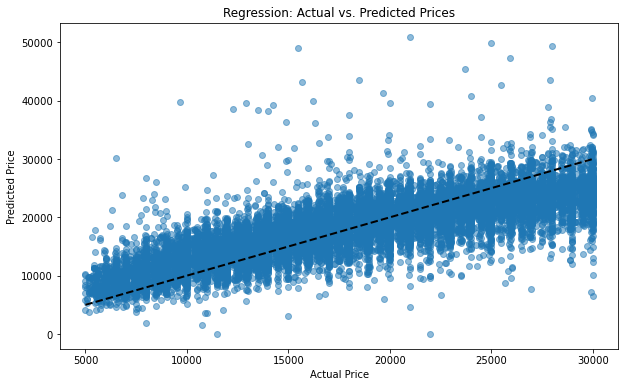

In [7]:
# Plotting y_test and y_pred_test to understand the spread.

fig = plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression: Actual vs. Predicted Prices')
plt.show()

In [8]:
# Linear Regression After Scaling
%run regression.ipynb
out = linear_reg_scaled(X_train, X_test, y_train, y_test)
print('Cross-Validation Error Metrics (Scaled):')
display(out[1])

Cross-Validation Error Metrics (Scaled):


,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2897.76,2393.66,0.64,0.46,0.38,2908.52,2391.41,0.64


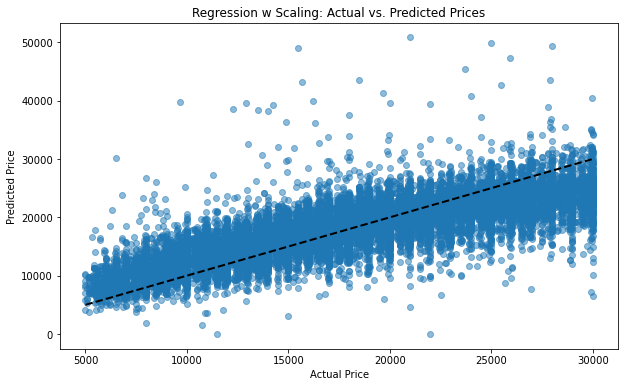

In [9]:
# Plotting scaled version of y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Regression w Scaling: Actual vs. Predicted Prices')
plt.show()

#### Conclusion

The results seem quite satisfactory; scaling does not change errors much.

 ###  2-2-Decision Tree

In [18]:
%run Decision_Tree.ipynb

y_pred_test, df_errors, scale_X, scale_y = decision_tree(X_train, X_test, y_train, y_test, cv_folds=5, decimal_places=2)

# Display the cross-validation error metrics
print('Cross-Validation Error Metrics (Decision Tree):')
display(df_errors)

Cross-Validation Error Metrics (Decision Tree):


,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,Dec. Tree Score
0,2841.62,2000.0,0.61,0.45,0.31,2807.9,2000.0,0.61


#### Conclusion.

-The errors are similar to the linear regression model.

-Execution time depends on the parameters as expected. 

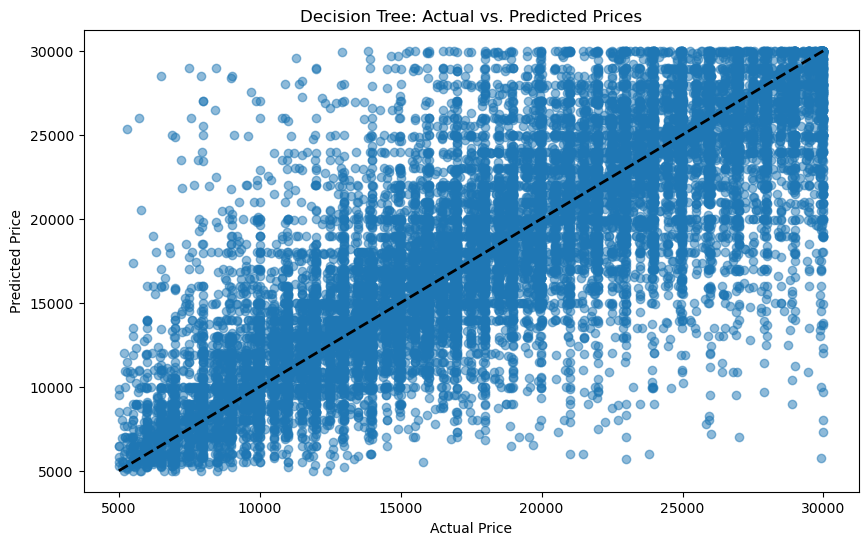

In [19]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs. Predicted Prices')
plt.show()

#### Note. 
Plotting Decision tree causes kernel fail and restart; This is because of the large size of the decision tree.

## 2-3-Bagging

In [31]:
%run Bagging.ipynb
import time

start_time = time.time()

estimator_range = [2, 4, 6, 8]  # estimator range selection
out = bagging(X_train, X_test, y_train, y_test, estimator_range, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
print('Cross-Validation Error Metrics (Bagging Regressor):')
display(out[1])

Execution Time:  81.53914713859558
Cross-Validation Error Metrics (Bagging Regressor):


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2,2650.11,1954.50,0.67,2650.11,1957.60,2627.72,1909.00,0.67
1,4,2494.26,1832.50,0.71,2494.26,1831.85,2472.51,1794.97,0.71
2,6,2440.78,1793.33,0.72,2440.78,1793.25,2423.92,1763.46,0.72
3,8,2413.93,1769.00,0.73,2413.93,1768.85,2391.86,1739.50,0.73


#### Note. accuracy increases as the estimator increases. The errors look satisfactory.

In [30]:
start_time = time.time()

estimator_range = [10,12]  # estimator range selection
out = bagging(X_train, X_test, y_train, y_test, estimator_range, cv_folds=5, decimal_places=2)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
print('Cross-Validation Error Metrics (Bagging Regressor):')
display(out[1])

Execution Time:  69.5996880531311
Cross-Validation Error Metrics (Bagging Regressor):


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,10,2396.42,1760.71,0.73,2396.42,1759.66,2376.28,1734.10,0.73
1,12,2384.02,1754.71,0.73,2384.02,1754.49,2364.22,1722.54,0.74


"for n_estimators in estimator_range:\n    display(out[1][out[1]['n_estimators'] == n_estimators])\n"

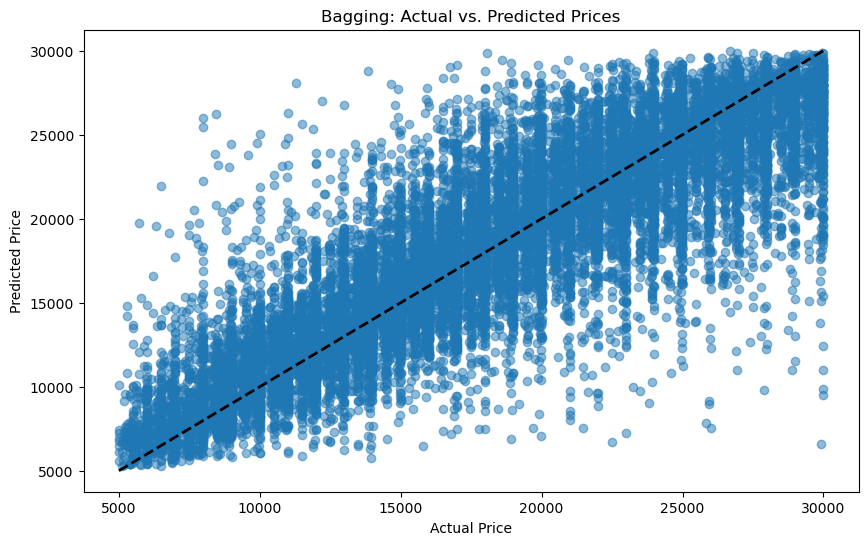

In [18]:
# Plotting y_test and y_pred_test to understand the spread.
y_pred_test = out[0]

fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Bagging: Actual vs. Predicted Prices')
plt.show()

Note. Visually, Bagging plot seems better than the previous ones.

### 2-4-AdaBoost  w Cross Validation

In [10]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [2, 4, 6, 8]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

n_estimators: 2, Predictions: [ 9738.55125523 20833.15255198 12731.5666221   9738.55125523
 20833.15255198 24340.14825102 24340.14825102 20456.95266895
 20833.15255198 20456.95266895]
n_estimators: 4, Predictions: [11674.46640729 15545.10770942 15417.91271565 11674.46640729
 20833.15255198 23162.8070008  23162.8070008  22237.06384394
 20833.15255198 20456.95266895]
n_estimators: 6, Predictions: [13374.14234141 15734.20972532 15417.91271565 13374.14234141
 21644.9677634  22776.8447462  22945.21513944 22237.06384394
 21688.05232165 20456.95266895]
n_estimators: 8, Predictions: [13374.14234141 20833.15255198 15417.91271565 13691.31263918
 21644.9677634  22776.8447462  22945.21513944 22237.06384394
 21688.05232165 20456.95266895]
Execution Time:  15.426784992218018


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2,3489.71,2970.86,0.53,3489.71,2974.44,3595.92,3066.85,0.51
1,4,3296.27,2860.06,0.58,3296.27,2865.76,3276.80,2821.12,0.59
2,6,3254.66,2881.92,0.60,3254.66,2875.38,3281.07,2872.15,0.60
3,8,3285.11,2958.84,0.60,3285.11,2956.30,3319.46,2964.78,0.60


In [11]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [10, 12]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

n_estimators: 10, Predictions: [15417.91271565 20833.15255198 15417.91271565 13691.31263918
 21644.9677634  22776.8447462  22338.38265246 22237.06384394
 21734.17557023 20456.95266895]
n_estimators: 12, Predictions: [15417.91271565 20833.15255198 15417.91271565 15417.91271565
 20833.15255198 22338.38265246 22338.38265246 22237.06384394
 21734.17557023 20456.95266895]
Execution Time:  16.669637203216553


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,10,3326.27,3016.70,0.60,3326.27,3013.61,3365.39,3045.04,0.59
1,12,3368.49,3064.95,0.59,3368.49,3070.76,3420.17,3127.85,0.58


In [12]:
%run adaboost.ipynb

start_time = time.time()

estimator_range = [16, 20]  # Estimator range selection
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)

end_time = time.time()
execution_time = end_time - start_time

print('Execution Time: ', execution_time)
display(out[1])

n_estimators: 16, Predictions: [15417.91271565 20833.15255198 15417.91271565 13725.5091534
 20833.15255198 22776.8447462  22338.38265246 22237.06384394
 21734.17557023 20184.4675795 ]
n_estimators: 20, Predictions: [13374.14234141 20833.15255198 15417.91271565 15417.91271565
 20833.15255198 22776.8447462  22510.55260882 22222.01080261
 21734.17557023 20184.4675795 ]
Execution Time:  26.06947350502014


,n_estimators,MAE CV,medAE CV,R2 CV,MAE Train (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,16,3438.37,3162.47,0.58,3438.37,3165.42,3461.34,3191.31,0.58
1,20,3501.59,3249.20,0.57,3501.59,3249.36,3489.33,3229.92,0.57


### Note. The best result seems to be for n_estimator = 6

n_estimators: 6, Predictions: [13374.14234141 15734.20972532 15417.91271565 13374.14234141
 21644.9677634  22776.8447462  22945.21513944 22237.06384394
 21688.05232165 20456.95266895]


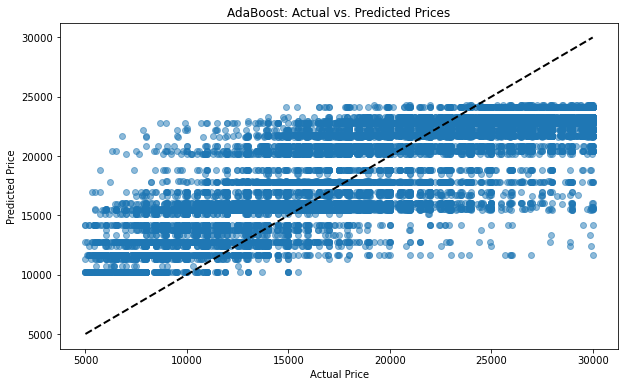

In [13]:
# Plotting y_test and y_pred to understand the spread.
estimator_range = [6]  
out = adaboost(X_train, X_test, y_train, y_test, estimator_range)
y_pred_test = out[0]
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('AdaBoost: Actual vs. Predicted Prices')
plt.show()

#### Conclusion. Quite larger errors that previous models

### 2-5-KNN w Cross Validation

In [13]:
%run KNN.ipynb

out = knn_model(X_train, X_test, y_train, y_test)

display(out[1])

,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2319.04,1738.58,0.75,0.36,0.27,2295.19,1703.89,0.75


<Figure size 1400x700 with 0 Axes>

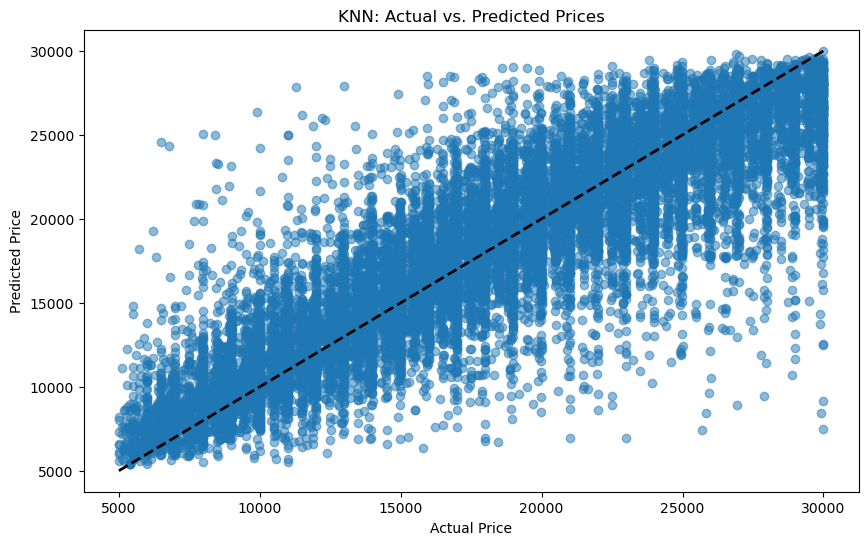

In [14]:
# Plotting the results
plt.figure(figsize=(14, 7))

# Plotting actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, out[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs. Predicted Prices')
plt.show()

#### Note. KNN results look quite satisfactory. In particular, it is much better than the other models tried before this. Other than that, 5-fold cross validation used with KNN seems to be a good idea as the data is quite scrapped.

###  2-6-Random Forest w Cross Validation

In [15]:
%run Random_Forest.ipynb

start_time = time.time()

out_rand_forest = random_forest(X_train, X_test, y_train, y_test)

end_time = time.time()
execution_time = end_time - start_time

print("Execution Time: ", execution_time)
display(out_rand_forest[1])

Execution Time:  1290.5806007385254


,MAE CV,medAE CV,R2 CV,MAE CV (mean),medAE Train (mean),MAE Test,medAE Test,R2 Test
0,2329.49,1715.98,0.75,0.37,0.27,2312.45,1684.05,0.75


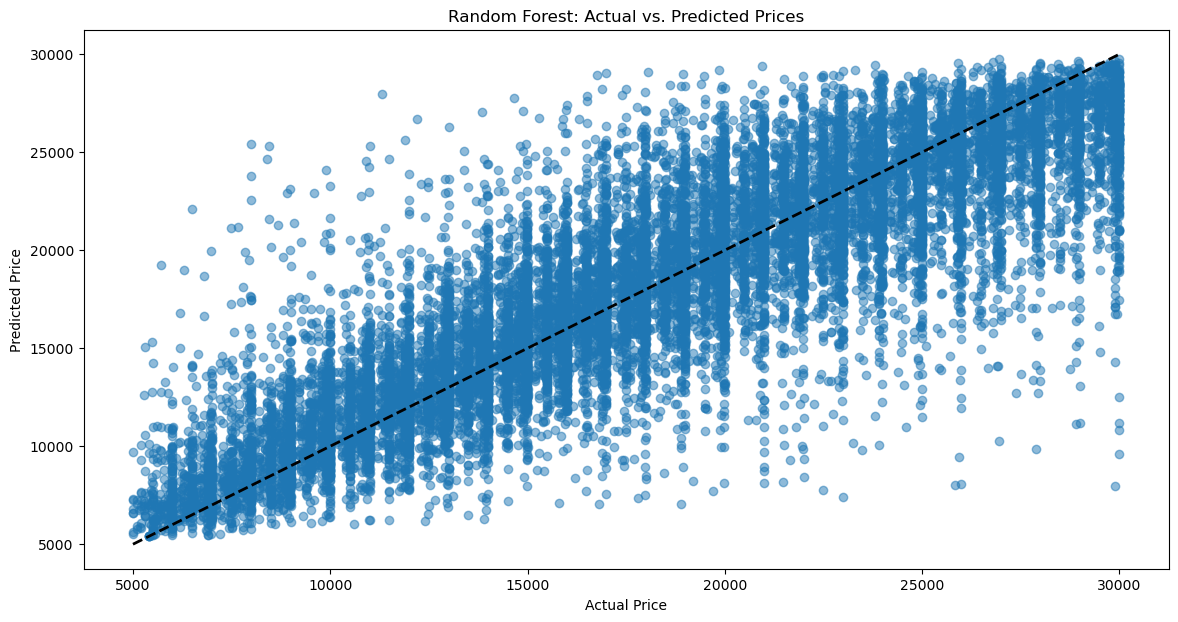

In [68]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.scatter(y_test, out_rand_forest[0], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.show()

#### Note. Random Forest seems to have the best error scores, even better than KNN.